In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import h5py
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [0]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


unlike TensorFlow, you don't have to create the graph and then make a separate sess.run() call to evaluate those variables.

BatchNormalization AXIS = 3 !

In [13]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [0]:
def model1(input_shape):

    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

In [0]:
# GRADED FUNCTION: HappyModel

def EmotionDetector(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """
    """
    Returns:
    model -- a Model() instance in Keras
    """

         
    X_input = Input(input_shape)
    X = Conv2D(16 , (5,5) , strides= (1,1) ,padding= 'same' , name = 'conv0')(X_input)
    X = BatchNormalization(axis=3 , beta_initializer= 'zeros' , gamma_initializer= 'ones', name = 'bn0')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D(pool_size=(3,3) , name = 'maxpool0')(X)

    X = Conv2D(32 , (3,3) , strides= (1,1) , padding='valid' , name = 'conv1')(X)
    X = BatchNormalization(axis=3 , beta_initializer= 'zeros' , gamma_initializer= 'ones', name = 'bn1')(X)
    X = Activation('relu')(X)

    X= Flatten()(X)
    X = Dense(5,activation='relu', name = 'fc0')(X)
    X = Dense(1, activation='sigmoid', name = 'fc1')(X)

    model = Model(input = X_input , output = X, name = 'MyfirstKerasModel')

    
    return model

In [55]:

emotionModel = EmotionDetector((64,64,3))

emotionModel.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="MyfirstKerasModel", inputs=Tensor("in..., outputs=Tensor("fc...)`


In [56]:
emotionModel.fit(x = X_train,y = Y_train,epochs = 50 ,batch_size = 60 )

Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 0.5517 - acc: 0.6583
Epoch 2/50
600/600 [==============================] - 0s 196us/step - loss: 0.2491 - acc: 0.9267
Epoch 3/50
600/600 [==============================] - 0s 201us/step - loss: 0.1606 - acc: 0.9433
Epoch 4/50
600/600 [==============================] - 0s 259us/step - loss: 0.0911 - acc: 0.9733
Epoch 5/50
600/600 [==============================] - 0s 202us/step - loss: 0.0675 - acc: 0.9833
Epoch 6/50
600/600 [==============================] - 0s 228us/step - loss: 0.0709 - acc: 0.9800
Epoch 7/50
600/600 [==============================] - 0s 239us/step - loss: 0.0577 - acc: 0.9817
Epoch 8/50
600/600 [==============================] - 0s 243us/step - loss: 0.0491 - acc: 0.9900
Epoch 9/50
600/600 [==============================] - 0s 237us/step - loss: 0.0386 - acc: 0.9867
Epoch 10/50
600/600 [==============================] - 0s 230us/step - loss: 0.0311 - acc: 0.9933
Epoch 11/50
600/600 [==========

In [57]:
### START CODE HERE ### (1 line)
preds = emotionModel.evaluate(x = X_test , y = Y_test )
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 2ms/step

Loss = 0.07643400837977728
Test Accuracy = 0.9600000039736429


In [58]:
emotionModel.summary()

Model: "MyfirstKerasModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 16)        1216      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 16)        64        
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
maxpool0 (MaxPooling2D)      (None, 21, 21, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 19, 19, 32)        4640      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 19, 19, 32)  

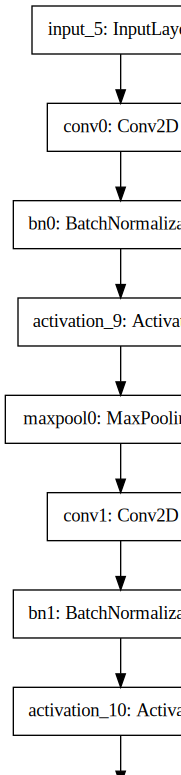

In [59]:
plot_model(emotionModel, to_file='emotionModel.png')
SVG(model_to_dot(emotionModel).create(prog='dot', format='svg'))